In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
kospi = pd.read_csv('kospi (1).csv', index_col = 0, encoding='cp949')
BTC = pd.read_excel('비트가격.xlsx',index_col = 0)
M2 =  pd.read_excel('M2.xlsx',index_col = 0)
indi =  pd.read_excel('경기종합지수.xlsx',index_col = 0)

# 1. KOSPI

In [3]:
import pandas as pd

# CSV 파일 경로
file_path = 'kospi (1).csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 변환되지 않은 값들 (NaT) 확인 및 제거
df.dropna(subset=['Date'], inplace=True)

# 'Date' 열을 인덱스로 설정
df.set_index('Date', inplace=True)

# 월별 데이터 생성
monthly_data_k = df.groupby(df.index.to_period('M')).mean()

# 데이터 프레임 만들기
df_k = monthly_data_k
df_k

,Close
Date,
2016-01,1894.651001
2016-02,1900.609999
2016-03,1976.502736
2016-04,1996.170496
2016-05,1966.675519
...,...
2023-12,2553.641075
2024-01,2518.588212
2024-02,2630.416337


# 2. BTC

In [4]:
import pandas as pd

# 엑셀 파일 경로
file_path = '비트가격.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 'Date' 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 변환되지 않은 값들 (NaT) 확인 및 제거
df.dropna(subset=['Date'], inplace=True)

# 'Date' 열을 인덱스로 설정
df.set_index('Date', inplace=True)

# 월별 데이터 생성
monthly_data_b = df.groupby(df.index.to_period('M')).mean()

# 데이터 프레임으로 만들기
df_b = monthly_data_b
df_b

,BTC
Date,
2016-01,4.991935e+05
2016-02,4.987069e+05
2016-03,4.974839e+05
2016-04,5.019000e+05
2016-05,5.457742e+05
...,...
2023-12,5.756526e+07
2024-01,5.853168e+07
2024-02,6.814628e+07


# 3. 경기선행지수

In [5]:
indicator = pd.read_excel('경기종합지수.xlsx', index_col = 0)
df_i=indicator
df_i

,선행종합지수(2020=100)
Date,
2016.01,85.6
2016.02,85.7
2016.03,86.0
2016.04,86.3
2016.05,86.6
...,...
2023.12,113.4
2024.01,113.7
2024.02,114.2


날짜 형식 맞추기

In [6]:
# 인덱스를 문자열로 변환
df_i.index = df_i.index.astype(str)

# 문자열로 변환된 인덱스의 형식을 조정하여 'YYYY.MM' 형식으로 맞추기
df_i.index = df_i.index.to_series().apply(lambda x: x if '.' in x else x + '.0')

# 인덱스를 datetime 형식으로 변환
df_i.index = pd.to_datetime(df_i.index, format='%Y.%m')

# 인덱스를 'YYYY-MM' 형식의 문자열로 변환
df_i.index = df_i.index.strftime('%Y-%m')

# 인덱스 이름 설정 (옵션)
df_i.index.name = 'Date'

In [7]:
import pandas as pd

# 주어진 데이터
data = df_i

# 데이터프레임 생성
df = pd.DataFrame(data)

# 인덱스를 datetime 형식으로 변환
df.index = pd.to_datetime(df.index)

# 인덱스를 원하는 형식으로 재조정하여 문자열로 변환
df.index = df.index.strftime('%Y-%m')

# 인덱스 이름 설정 (옵션)
df.index.name = 'Date'

# 변경된 데이터프레임 출력
print(df)

df_leading = df.copy()

         선행종합지수(2020=100)
Date                     
2016-01              85.6
2016-02              85.7
2016-03              86.0
2016-04              86.3
2016-05              86.6
...                   ...
2023-12             113.4
2024-01             113.7
2024-02             114.2
2024-03             114.3
2024-04             114.8

[100 rows x 1 columns]


# 4. M2

In [8]:
M2 = pd.read_excel('M2.xlsx', index_col = 0)
df_M=M2

In [9]:
# 인덱스를 문자열로 변환
df_M.index = df_M.index.astype(str)

# 문자열로 변환된 인덱스의 형식을 조정하여 'YYYY.MM' 형식으로 맞추기
df_M.index = df_M.index.to_series().apply(lambda x: x if '.' in x else x + '.0')

# 인덱스를 datetime 형식으로 변환
df_M.index = pd.to_datetime(df_M.index, format='%Y.%m')

# 인덱스를 'YYYY-MM' 형식의 문자열로 변환
df_M.index = df_M.index.strftime('%Y-%m')

# 인덱스 이름 설정 (옵션)
df_M.index.name = '날짜'

In [10]:
import pandas as pd

# 주어진 데이터
data = df_M

# 데이터프레임 생성
df = pd.DataFrame(data)

# 인덱스를 datetime 형식으로 변환
df.index = pd.to_datetime(df.index)

# 인덱스를 원하는 형식으로 재조정하여 문자열로 변환
df.index = df.index.strftime('%Y-%m')

# 인덱스 이름 설정 (옵션)
df.index.name = 'Date'

# 변경된 데이터프레임 출력
print(df)

df_M2 = df.copy()

         M2(평잔, 원계열)
Date                
2016-01    2261356.4
2016-02    2285313.5
2016-03    2294544.7
2016-04    2299081.3
2016-05    2312801.2
...              ...
2023-12    3916721.0
2024-01    3909835.3
2024-02    3937145.6
2024-03    4000898.1
2024-04    4010852.8

[100 rows x 1 columns]


인덱스 통일

In [11]:
df_leading.index = df_k.index

In [12]:
df_M2.index = df_b.index

데이터 프레임 합치기

In [13]:
dfs1 = [df_k, df_leading]
combined_df1 = pd.concat(dfs1, axis=1)
print(combined_df1)

               Close  선행종합지수(2020=100)
Date                                  
2016-01  1894.651001              85.6
2016-02  1900.609999              85.7
2016-03  1976.502736              86.0
2016-04  1996.170496              86.3
2016-05  1966.675519              86.6
...              ...               ...
2023-12  2553.641075             113.4
2024-01  2518.588212             113.7
2024-02  2630.416337             114.2
2024-03  2699.587036             114.3
2024-04  2674.249988             114.8

[100 rows x 2 columns]


In [14]:
dfs2=[df_M2, df_b]
combined_df2 = pd.concat(dfs2, axis=1)
print(combined_df2)

         M2(평잔, 원계열)           BTC
Date                              
2016-01    2261356.4  4.991935e+05
2016-02    2285313.5  4.987069e+05
2016-03    2294544.7  4.974839e+05
2016-04    2299081.3  5.019000e+05
2016-05    2312801.2  5.457742e+05
...              ...           ...
2023-12    3916721.0  5.756526e+07
2024-01    3909835.3  5.853168e+07
2024-02    3937145.6  6.814628e+07
2024-03    4000898.1  9.642045e+07
2024-04    4010852.8  9.564367e+07

[100 rows x 2 columns]


In [15]:
combined_last_df = pd.concat([combined_df1, combined_df2], axis=1)

In [2]:
last_df = pd.read_csv('그래인저 최종.csv',encoding='cp949',index_col=0)
last_df

,Close,선행종합지수(2020=100),"M2(평잔, 원계열)",BTC,sent_index
Date,,,,,
Jul-16,2002.482846,87.2,2352245.1,7.721935e+05,108.450704
Aug-16,2036.656367,87.6,2377323.1,6.591290e+05,142.274053
Sep-16,2042.555266,88.0,2383040.5,6.809000e+05,80.952381
Oct-16,2036.032513,88.4,2391059.2,7.322581e+05,97.142857
Nov-16,1981.746366,88.8,2406393.5,8.531667e+05,100.262467
...,...,...,...,...,...
Dec-23,2553.641075,113.4,3916721.0,5.756526e+07,148.148148
Jan-24,2518.588212,113.7,3909835.3,5.853168e+07,98.647242
Feb-24,2630.416337,114.2,3937145.6,6.814628e+07,115.575621


# **그래인저 인과검정**

In [25]:
maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables)*maxlag)), columns=[f'{var}_x_lag{i+1}' for i in range(maxlag) for var in variables], index=variables)

    for c in variables:
        for r in variables:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]


            if r == 'Close':    # 주요하게 볼 KOSPI 지수에 대해서만 pirnt하도록 하겠습니다.
                #if verbose:
              print(f'''Y = {r}, X = {c}, P Values = {p_values}''')
            if r == 'sent_index':
               print(f'''Y = {r}, X = {c}, P Values = {p_values}''')
               # df.loc[c, [f'{r}_x_lag{i+1}' for i in range(maxlag)]] = p_values

    return df

grangers_causation_matrix(last_df, variables = last_df.columns,test=test)

Y = Close, X = Close, P Values = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Y = sent_index, X = Close, P Values = [0.8534, 0.319, 0.36, 0.1832, 0.0781, 0.0842, 0.0214, 0.0285, 0.0261, 0.007, 0.0005, 0.0031]
Y = Close, X = 선행종합지수(2020=100), P Values = [0.5699, 0.0383, 0.0678, 0.2748, 0.3913, 0.0609, 0.0199, 0.0536, 0.0469, 0.0515, 0.0549, 0.0597]
Y = sent_index, X = 선행종합지수(2020=100), P Values = [0.5873, 0.0745, 0.1834, 0.2193, 0.1906, 0.0554, 0.0423, 0.0468, 0.0164, 0.0095, 0.0014, 0.0053]
Y = Close, X = M2(평잔, 원계열), P Values = [0.707, 0.8049, 0.4673, 0.1211, 0.0204, 0.0423, 0.0591, 0.0117, 0.0066, 0.0136, 0.0106, 0.0062]
Y = sent_index, X = M2(평잔, 원계열), P Values = [0.4758, 0.6231, 0.7353, 0.9369, 0.9879, 0.9723, 0.8943, 0.7587, 0.8476, 0.7765, 0.645, 0.4839]
Y = Close, X = BTC, P Values = [0.6506, 0.347, 0.5562, 0.5762, 0.4863, 0.5569, 0.5448, 0.5725, 0.6216, 0.7625, 0.5006, 0.1439]
Y = sent_index, X = BTC, P Values = [0.9314, 0.18, 0.2836, 0.1634, 0.1789, 0.269, 0.28

,Close_x_lag1,선행종합지수(2020=100)_x_lag1,"M2(평잔, 원계열)_x_lag1",BTC_x_lag1,sent_index_x_lag1,Close_x_lag2,선행종합지수(2020=100)_x_lag2,"M2(평잔, 원계열)_x_lag2",BTC_x_lag2,sent_index_x_lag2,...,Close_x_lag11,선행종합지수(2020=100)_x_lag11,"M2(평잔, 원계열)_x_lag11",BTC_x_lag11,sent_index_x_lag11,Close_x_lag12,선행종합지수(2020=100)_x_lag12,"M2(평잔, 원계열)_x_lag12",BTC_x_lag12,sent_index_x_lag12
Close,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
선행종합지수(2020=100),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"M2(평잔, 원계열)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sent_index,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# ADF 테스트 함수 정의
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    return pd.Series({'Test Statistic': result[0], 'p-value': result[1], 'Critical Values': result[4]})

adf_results = {var: adf_test(last_df[var]) for var in last_df.columns}

# ADF 테스트 결과 출력 및 해석
for var, result in adf_results.items():
    print(f"\nADF Test Results for {var}:")
    print(result)
    
    if result['p-value'] <= 0.05:
        print(f"해석: {var}는 5% 유의수준에서 정상 시계열입니다.")
    else:
        print(f"해석: {var}는 5% 유의수준에서 비정상 시계열입니다.")


ADF Test Results for Close:
Test Statistic                                             -3.106881
p-value                                                     0.026048
Critical Values    {'1%': -3.5087828609430614, '5%': -2.895783561...
dtype: object
해석: Close는 5% 유의수준에서 정상 시계열입니다.

ADF Test Results for 선행종합지수(2020=100):
Test Statistic                                                0.2327
p-value                                                     0.974037
Critical Values    {'1%': -3.5087828609430614, '5%': -2.895783561...
dtype: object
해석: 선행종합지수(2020=100)는 5% 유의수준에서 비정상 시계열입니다.

ADF Test Results for M2(평잔, 원계열):
Test Statistic                                              0.161498
p-value                                                     0.970018
Critical Values    {'1%': -3.506057133647011, '5%': -2.8946066061...
dtype: object
해석: M2(평잔, 원계열)는 5% 유의수준에서 비정상 시계열입니다.

ADF Test Results for BTC:
Test Statistic                                             -0.479917
p-value               

<Axes: xlabel='Date'>

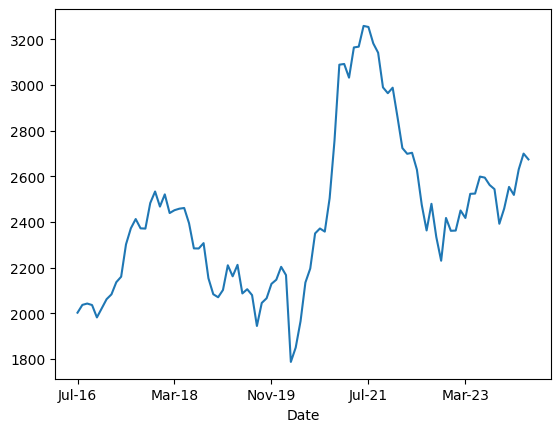

In [6]:
last_df['Close'].plot()

c:\Users\82107\Documents\GitHub\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\82107\Documents\GitHub\.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       17.73       17.79   5.010e+07       17.75
1      14.76*      14.93*  2.568e+06*      14.83*
2       14.80       15.08   2.682e+06       14.92
3       14.78       15.18   2.637e+06       14.94
4       14.83       15.33   2.756e+06       15.03
5       14.83       15.45   2.755e+06       15.08
6       14.81       15.54   2.713e+06       15.10
-------------------------------------------------


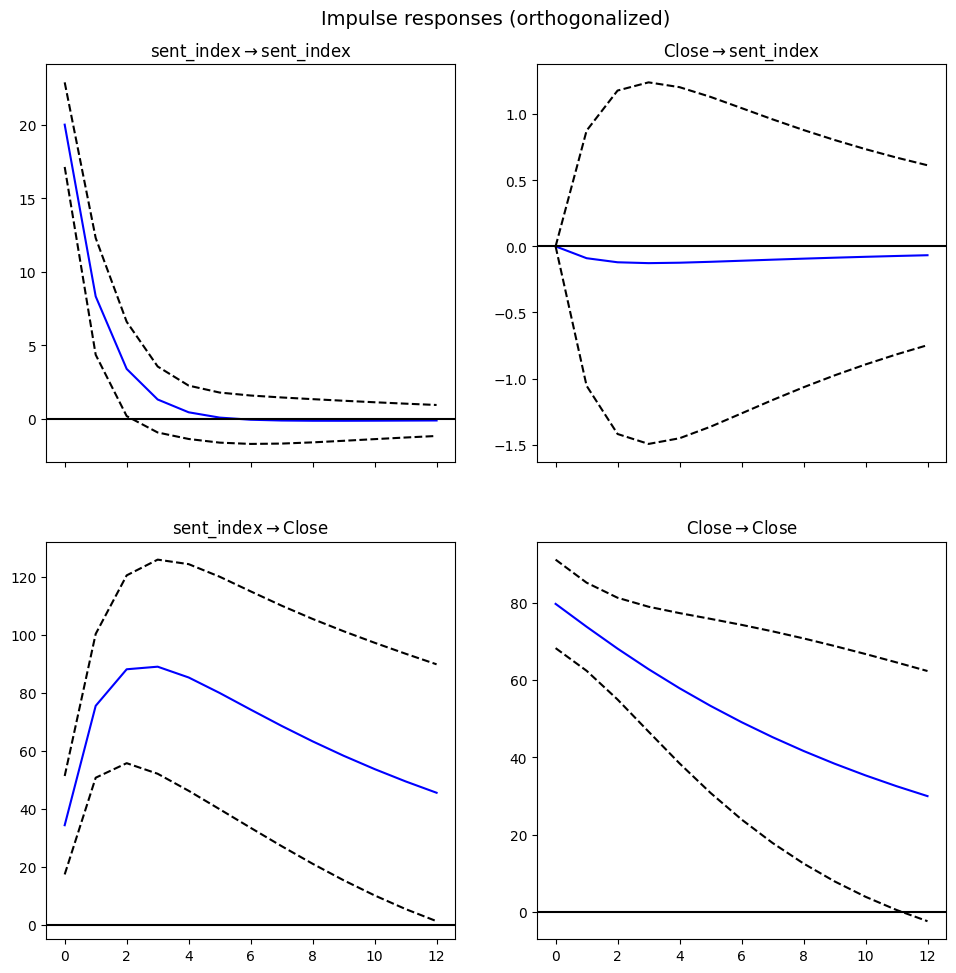

In [3]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

df = last_df[['sent_index', 'Close']].dropna() 
model = VAR(df)
lag_order = model.select_order(maxlags=6)
print(lag_order.summary())
var_model = model.fit(lag_order.hqic)
irf = var_model.irf(12)  # 10 기간 동안의 충격 반응 계산

irf.plot(orth=True,figsize=(10,10))
plt.show()

In [6]:
# 충격반응 결과를 데이터로 저장
irf_results = irf.orth_irfs

norm_senti_to_종가지수 = irf_results[:, 1, 0]
last = 0
# 결과 출력
for i, value in enumerate(norm_senti_to_종가지수):
    print(f"기간 {i}: {value-last}")
    last = value

기간 0: 34.39590118160035
기간 1: 41.11579656999298
기간 2: 12.585909885608842
기간 3: 0.8888157359407955
기간 4: -3.712113345387195
기간 5: -5.336586858625708
기간 6: -5.726526675326284
기간 7: -5.617369135064379
기간 8: -5.3186052499995
기간 9: -4.959545334531207
기간 10: -4.593354172554456
기간 11: -4.241084573864455
기간 12: -3.9103095197733992
